In [3]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

#視覺化函式庫
import matplotlib as mpl
import seaborn as sns


In [20]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=10,     #共產生多少筆資料(samples)
           centers=3,      #共產生多少群
           n_features=2,     #共產生多少特徵
           random_state=1    #亂數種子，相同亂數種子，產生相同結果   
          )

#X為sample的集合，每個sample有兩個features
print(type(X))
print(X.shape)
print(X)

#y為每個sample對應的群ID
print(type(y))
print(y.shape)
print(y)


<class 'numpy.ndarray'>
(10, 2)
[[ -7.23731039  -9.03108652]
 [ -8.16550136  -7.00850439]
 [ -7.02266844  -7.57041289]
 [ -8.86394306  -5.05323981]
 [  0.08525186   3.64528297]
 [ -0.79415228   2.10495117]
 [ -1.34052081   4.15711949]
 [-10.32012971  -4.3374029 ]
 [ -2.18773166   3.33352125]
 [ -8.53560457  -6.01348926]]
<class 'numpy.ndarray'>
(10,)
[2 2 2 1 0 0 0 1 0 1]


In [24]:
from sklearn.datasets import make_blobs

#未使用y，所以將設定"_"
X,_= make_blobs(random_state=10)

print(X)

[[ -2.32496308  -6.6999964 ]
 [  0.51856831  -4.90086804]
 [  2.44301805   3.84652646]
 [  5.82662285  -9.92259335]
 [  2.03300209   5.28990817]
 [  3.37979515   4.18880872]
 [  6.04774884 -10.30504657]
 [ -0.42084194  -4.24889336]
 [  3.78067293   5.22062163]
 [  5.69248303  -7.19999368]
 [  5.15909568 -10.13427003]
 [  1.16464321   5.59667831]
 [  2.94601402   3.3575069 ]
 [  1.1882891   -5.56058781]
 [ -0.31748917  -6.86337766]
 [  4.32968132   5.64396726]
 [  4.28981065  -9.44982413]
 [  3.49996332   3.02156553]
 [  5.31414039  -9.94714146]
 [  2.61105267   4.22218469]
 [  4.88653379  -8.87680099]
 [  1.95552599  -4.05690149]
 [  2.09985134   3.6556301 ]
 [  1.31468967  -5.01055177]
 [  5.52556208  -8.18696464]
 [  0.81677922   4.75330395]
 [  2.52859794   4.5759393 ]
 [  3.69548081   5.14288792]
 [  2.37698085   5.82428626]
 [  5.69192445  -9.47641249]
 [  0.91726632  -6.52637778]
 [  1.44712872   4.75428451]
 [  2.96590542   4.5052704 ]
 [  6.68288513 -10.31693051]
 [ -0.43558928

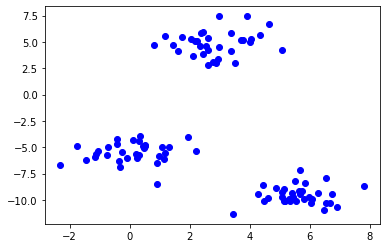

In [25]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],color="blue")

In [26]:
from sklearn.cluster import KMeans

#KMeans類別的初始化


#init="random"是採用k-means法
#init="k-means++"則是採用k-means++法
#n_clusters=3
km = KMeans(init="random",n_clusters=3)

#計算群中心
km.fit(X)

#預測群體編號
y_pred = km.predict(X)

print(type(y_pred))
print(y_pred.shape)
print(y_pred)

<class 'numpy.ndarray'>
(100,)
[0 0 1 2 1 1 2 0 1 2 2 1 1 0 0 1 2 1 2 1 2 0 1 0 2 1 1 1 1 2 0 1 1 2 0 0 0
 1 1 1 0 2 0 0 1 2 2 2 0 2 1 0 2 2 0 2 1 0 2 2 1 1 0 0 0 2 2 0 0 0 1 2 1 1
 0 1 1 0 2 2 2 1 2 1 0 1 0 2 0 0 2 2 2 0 0 0 1 2 2 2]


In [ ]:
import pandas as pd

merge_data = pd.concat([pd.DataFrame(X),pd.DataFrame(y_pred)],
             axis=1)
print(merge_data)

merge_data.columns = ["feature1","feature2","cluster_label"]

print(merge_data)

In [ ]:
#將分群的結果圖形化

g = merge_data.groupby("cluster_label")

print(type(g))
print(g.size())

#取出cluster_label為2的所有資料
cl2 = g.get_group(2)
print(cl2)


In [ ]:
for a,b in merge_data.groupby("cluster_label"):
  print(a) #a為群的cluster_label

In [ ]:
for a,b in merge_data.groupby("cluster_label"):
  print(b) #b為相對應的資料

In [ ]:
for c in merge_data.groupby("cluster_label"):
  print(c) #c為相對應的資料

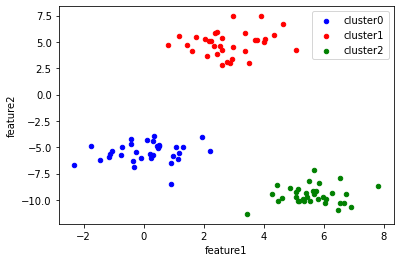

In [61]:
color_seq = ["blue","red","green"]
ax = None
for i,b in merge_data.groupby("cluster_label"):
  ax = b.plot.scatter(x="feature1",    
             y="feature2",
             color=color_seq[i],
             label=f"cluster{i}",
             ax=ax)         #在原圖上面增加點